# Performance measurements of ML algorithms (Supervised)

In [29]:
#import library packages
import pandas as p
import numpy as n

In [30]:
import warnings
warnings.filterwarnings("ignore") 

In [31]:
#Load given dataset
data = p.read_csv('data.csv')
df=data.dropna()

In [32]:
df.columns

Index(['email', 'label'], dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['email', 'label']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [34]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [35]:
X = df.drop(labels='label', axis=1)
#Response variable
y = df.loc[:,'label'] 
print(X)
print()


      email
0       226
1      1529
2      1522
3      1505
4       532
...     ...
2995     88
2996    452
2997    788
2998    798
2999    404

[2999 rows x 1 columns]



In [36]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

RandomForestClassifier :

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)
predictR = rfc.predict(X_test)
print("")
x = (accuracy_score(y_test,predictR)*100)
print('Accuracy result of Random Forest Classifier  is:', x)
print("")

print("")
print('Classification report of Random Forest Classifier : Results:')
print("")

print(classification_report(y_test,predictR))
xd = (accuracy_score(y_test,predictR)*100)


cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest Classifier : is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)


Accuracy result of Random Forest Classifier  is: 88.88888888888889


Classification report of Random Forest Classifier : Results:

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       750
           1       0.65      0.74      0.69       150

    accuracy                           0.89       900
   macro avg       0.80      0.83      0.81       900
weighted avg       0.90      0.89      0.89       900

Confusion Matrix result of Random Forest Classifier : is:
 [[689  61]
 [ 39 111]]

Sensitivity :  0.9186666666666666

Specificity :  0.74


Logistic Regression:

In [38]:
from sklearn.linear_model import LogisticRegression
logR= LogisticRegression()
logR.fit(X_train,y_train)
predictR = logR.predict(X_test)
print("")
x = (accuracy_score(y_test,predictR)*100)
print('Accuracy result of Logistic Regression is:', x)
print("")

print("")
print('Classification report of Logistic Regression : Results:')
print("")

print(classification_report(y_test,predictR))
xl = (accuracy_score(y_test,predictR)*100)


cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression : is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)


Accuracy result of Logistic Regression is: 83.33333333333334


Classification report of Logistic Regression : Results:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       750
           1       0.00      0.00      0.00       150

    accuracy                           0.83       900
   macro avg       0.42      0.50      0.45       900
weighted avg       0.69      0.83      0.76       900

Confusion Matrix result of Logistic Regression : is:
 [[750   0]
 [150   0]]

Sensitivity :  1.0

Specificity :  0.0


In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
predictR = xgb.predict(X_test)
print("")
x = (accuracy_score(y_test,predictR)*100)
print('Accuracy result of XGBClassifier is:', x)
print("")

print("")
print('Classification report of XGBClassifier : Results:')
print("")

print(classification_report(y_test,predictR))
xg = (accuracy_score(y_test,predictR)*100)


cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of XGBClassifier : is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)


Accuracy result of XGBClassifier is: 88.88888888888889


Classification report of XGBClassifier : Results:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       750
           1       0.69      0.60      0.64       150

    accuracy                           0.89       900
   macro avg       0.81      0.77      0.79       900
weighted avg       0.88      0.89      0.89       900

Confusion Matrix result of XGBClassifier : is:
 [[710  40]
 [ 60  90]]

Sensitivity :  0.9466666666666667

Specificity :  0.6


In [42]:
def graph():
    import matplotlib.pyplot as plt
    data=[xd,xl,xg]
    alg="RFC","LR","XG"
    plt.figure(figsize=(10,5))
    b=plt.bar(alg,data,color=("black","gray","red"))
    plt.title("Prediction of Opinion ham or spam using ML",fontsize=15)
    plt.legend(b,data,fontsize=12)
    plt.savefig('comp.png')

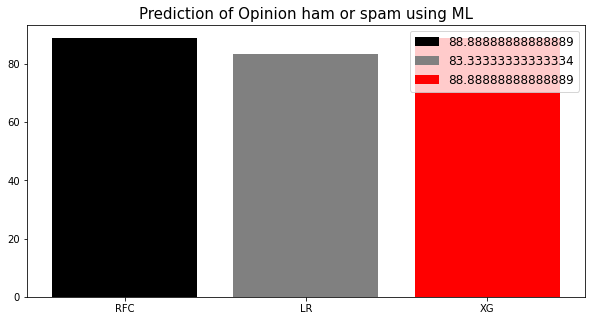

In [43]:
graph()